In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters

%matplotlib inline

In [2]:
#fitness function
    
def fitness(chromosome):
    score = 0.0
    # iterate over the chromosome
    for value in chromosome:
        if value==1:
            score += 1
    return score

In [3]:
# Chromosome representation

# genome = bitstring
genome = G1DBinaryString.G1DBinaryString(20)

# how to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.9)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="log_bit-string")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(100)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=10)

# Final best solution
print(ga.bestIndividual())

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [11.87(16.00)/7.98(4.00)/9.89(9.89)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [16.07(18.00)/9.68(7.00)/13.39(13.39)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [16.32(20.00)/11.22(8.00)/13.60(13.60)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [17.56(20.00)/12.11(10.00)/14.63(14.63)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [18.01(20.00)/10.79(8.00)/15.01(15.01)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [18.00(20.00)/12.60(11.00)/15.00(15.00)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [18.54(20.00)/11.75(10.00)/15.45(15.45)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [20.22(20.00)/12.73(13.00)/16.85(16.85)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [20.62(20.00)/13.31(14.00)/17.18(17.18)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [21.22(20.00)/9.02(12.00)/17.68(17.68)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [20.68(20.00)/10.72(12.00)/17.23(17.23)]
Total time elapsed: 0.574 seconds.
- GenomeBase
	Score:			 20.000000
	Fitness:		 20.6

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


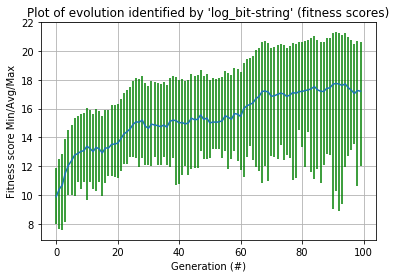

In [6]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ../src/pyevolve/pyevolve_graph.py -i log_bit-string -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


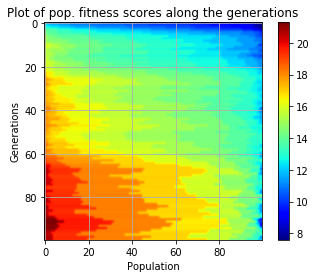

In [7]:
# Generate a heatmap of population fitness score distribution over generations
%run ../src/pyevolve/pyevolve_graph.py -i log_bit-string -9